In [55]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv("weight-height.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


# Discrepancy in Dataset! (Most probably user defined)

In [28]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [29]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


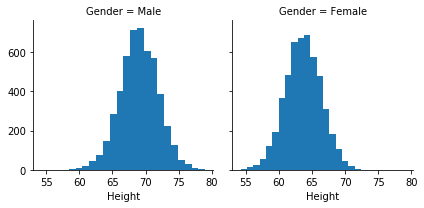

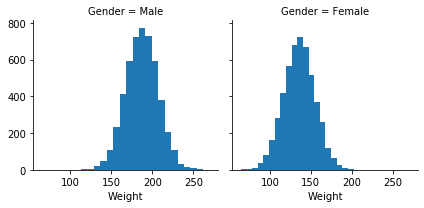

In [30]:
g = sns.FacetGrid(df, col = 'Gender')
g.map(plt.hist, 'Height', bins = 20)

g = sns.FacetGrid(df, col = 'Gender')
g.map(plt.hist, 'Weight', bins = 20)

## Decsion Tree Boundary Can be Easily Defined

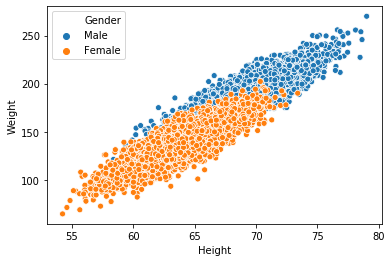

In [31]:
ax = sns.scatterplot(x="Height", y="Weight", hue="Gender",
                     data=df)

# Moulding Dataset For Easier Fit

In [32]:
for i in range (len(df)):
    if df.loc[i,"Gender"] == "Female":
        df.loc[i,"Gender"] = 1
    if df.loc[i,"Gender"] == "Male":
        df.loc[i,"Gender"] = 0

In [33]:
for i in range (len(df)):
    df.loc[i,"Height"] = round(df.loc[i,"Height"],2)
    df.loc[i,"Weight"] = round(df.loc[i,"Weight"],2)

In [34]:
df.head()

,Gender,Height,Weight
0,0,73.85,241.89
1,0,68.78,162.31
2,0,74.11,212.74
3,0,71.73,220.04
4,0,69.88,206.35


# Splitting Dataset

In [59]:
train_df, test_df = train_test_split(df, test_size = 0.3)

In [38]:
print("Shape of train_df ",train_df.shape)
print("Shape of test_df ",test_df.shape)

Shape of train_df  (7000, 3)
Shape of test_df  (3000, 3)


In [41]:
X_train = train_df.drop(['Gender'],axis = 1)
Y_train = train_df["Gender"]

X_test = test_df.drop(['Gender'],axis = 1)
Y_test = test_df["Gender"]

# Classification

In [56]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

86.59

In [58]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,Y_train)
log_pred = logisticRegr.predict(X_test)
print("Accuracy using Logistic Regression ", round(score, 1), "%")

Accuracy using Logistic Regression  91.1 %


/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
c = DecisionTreeClassifier(min_samples_split = 100)
dt = c.fit(X_train,Y_train)
y_pred = c.predict(X_test)
score = accuracy_score(Y_test,y_pred) * 100
print("Accuracy using Decision Tree ", round(score, 1), "%")

Accuracy using Decision Tree  91.1 %


In [68]:
y_p = c.predict([[74,242]])

result = "Female"
if y_p[0] == 0:
    result = "Male"
    
print(result)    

Male


In [70]:
y_p = c.predict([[67,138]])

result = "Female"
if y_p[0] == 0:
    result = "Male"
    
print(result)

Female
